In [40]:
import pandas as pd
import helper_functions as hf
import numpy as np


In [41]:
df = hf.load_data()
df

,index_x,ticker,simfinid_x,date,open,high,low,close,adj_close,volume,...,non-operating_income_loss,interest_expense_net,pretax_income_loss_adj,abnormal_gains_losses,pretax_income_loss,income_tax_expense_benefit_net,income_loss_from_continuing_operations,net_extraordinary_gains_losses,net_income,net_income_common
0,16033,AAPL,111052,2019-12-23,70.13,71.06,70.09,71.00,68.53,98711532,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40152,ABT,63877,2019-12-23,86.31,87.46,86.28,87.35,78.56,4067769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,95854,ADBE,14099,2019-12-23,328.83,329.88,327.26,328.95,328.95,2210706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,296720,AMGN,65735,2019-12-23,243.98,244.00,241.59,243.03,203.47,1686220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,333254,AMZN,62747,2019-12-23,89.41,89.65,89.23,89.65,89.65,42749860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60755,5695307,UNH,367714,2024-11-25,597.58,609.84,595.01,605.83,592.89,5146485,...,-1.074000e+09,-1.074000e+09,7.634000e+09,-20000000.0,7.614000e+09,-1.356000e+09,6.258000e+09,NaN,6.055000e+09,6.055000e+09
60756,5755996,V,107326,2024-11-25,311.86,313.66,309.86,313.19,310.99,14189302,...,2.300000e+07,-1.760000e+08,6.590000e+09,-218000000.0,6.372000e+09,-1.054000e+09,5.318000e+09,NaN,5.318000e+09,5.318000e+09
60757,5926877,VZ,101219,2024-11-25,43.34,44.05,43.31,43.98,41.15,28365883,...,-1.624000e+09,-1.672000e+09,4.302000e+09,NaN,4.302000e+09,-8.910000e+08,3.411000e+09,NaN,3.306000e+09,3.306000e+09
60758,6024283,WMT,239962,2024-11-25,90.50,90.95,89.06,89.50,88.64,25078633,...,-4.780000e+08,-4.780000e+08,6.230000e+09,-132000000.0,6.098000e+09,-1.384000e+09,4.714000e+09,NaN,4.577000e+09,4.577000e+09


In [ ]:
df = hf.create_engineered_plus_fundamental_features(df)
df.index = df["date"]
df = df[['ret','volume', 'mean_20', 'mean_60',"ticker",
    'vol_20', 'vol_60',
    'mom_20', 'mom_60',
    'ema_12', 'ema_26', 'ema_cross',
    'skew_20', 'skew_60',
    'kurt_20', 'kurt_60',
    'vol_z',
    'eps',
    'profit_margin',
    'revenue_growth',
    'income_growth',
    'gross_margin',
    'operating_margin',
    'sga_ratio',
    'rd_ratio',
    'cost_ratio',
    'net_income_per_share',
    'tax_burden',
    'nonop_ratio',
    'abnormal_ratio',
    'revenue_per_share',
    'da_ratio',
    'interest_coverage',
    'interest_burden'
]]

numeric_cols = df.columns.difference(['ticker'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
total_correlations = df[numeric_cols].corr()
grouped = df.groupby("ticker")
df[df["ticker"] == "ORCL"]
total_correlations


/Users/santi/PycharmProjects/ML-Stock-Predictor/helper_functions.py:64: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['revenue_growth'] = df.groupby('ticker')['revenue'].pct_change()
/Users/santi/PycharmProjects/ML-Stock-Predictor/helper_functions.py:66: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["income_growth"] = df.groupby("ticker")["net_income"].pct_change()
/var/folders/rd/6pjhbndj3_xbc_vx64hj0zh00000gn/T/ipykernel_43096/4129323877.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,abnormal_ratio,cost_ratio,da_ratio,ema_12,ema_26,ema_cross,eps,gross_margin,income_growth,interest_burden,...,revenue_growth,revenue_per_share,sga_ratio,skew_20,skew_60,tax_burden,vol_20,vol_60,vol_z,volume
abnormal_ratio,1.000000,0.055450,0.089496,0.011853,0.011169,2.337523e-02,0.409035,0.055450,0.000723,-0.267410,...,5.806383e-03,0.025702,-0.097573,-0.015589,-0.022109,-0.360838,-0.006761,-0.024399,0.002092,-0.034903
cost_ratio,0.055450,1.000000,-0.204922,-0.030443,-0.029990,-2.085858e-02,-0.017769,1.000000,-0.004979,0.040496,...,-3.212042e-03,-0.440507,-0.599682,-0.012852,-0.012690,-0.063764,-0.039154,-0.049093,0.008379,-0.023208
da_ratio,0.089496,-0.204922,1.000000,0.458117,0.458320,6.409445e-02,0.541881,-0.204922,0.007435,-0.049800,...,2.770456e-03,0.265451,-0.039203,-0.003767,-0.011788,0.042331,-0.032297,-0.035063,-0.014732,-0.259383
ema_12,0.011853,-0.030443,0.458117,1.000000,0.999553,2.553725e-01,0.592946,-0.030443,0.000133,0.007369,...,-2.826728e-03,0.546847,-0.024373,-0.031406,0.004656,-0.039380,-0.084372,-0.101083,0.001889,-0.196073
ema_26,0.011169,-0.029990,0.458320,0.999553,1.000000,2.265571e-01,0.593729,-0.029990,0.000069,0.007053,...,-2.850534e-03,0.547101,-0.025587,-0.039017,-0.002737,-0.039485,-0.079848,-0.100357,0.003445,-0.197235
ema_cross,0.023375,-0.020859,0.064094,0.255372,0.226557,1.000000e+00,0.112982,-0.020859,0.002387,0.011590,...,-2.767754e-07,0.118168,0.032125,0.223137,0.238981,-0.005813,-0.174303,-0.054685,-0.040107,-0.009208
eps,0.409035,-0.017769,0.541881,0.592946,0.593729,1.129824e-01,1.000000,-0.017769,0.001322,0.118848,...,2.930581e-03,0.500417,0.060297,-0.037903,-0.023248,-0.102380,-0.130637,-0.172795,0.002430,-0.192669
gross_margin,0.055450,1.000000,-0.204922,-0.030443,-0.029990,-2.085858e-02,-0.017769,1.000000,-0.004979,0.040496,...,-3.212042e-03,-0.440507,-0.599682,-0.012852,-0.012690,-0.063764,-0.039154,-0.049093,0.008379,-0.023208
income_growth,0.000723,-0.004979,0.007435,0.000133,0.000069,2.386757e-03,0.001322,-0.004979,1.000000,-0.008247,...,2.175075e-02,0.001759,0.001778,0.002247,0.005822,0.000379,0.001743,0.001501,-0.001847,0.001627
interest_burden,-0.267410,0.040496,-0.049800,0.007369,0.007053,1.158977e-02,0.118848,0.040496,-0.008247,1.000000,...,-5.145830e-03,0.010507,-0.025213,0.020399,0.004719,-0.124697,-0.029101,-0.031641,0.001518,0.005506


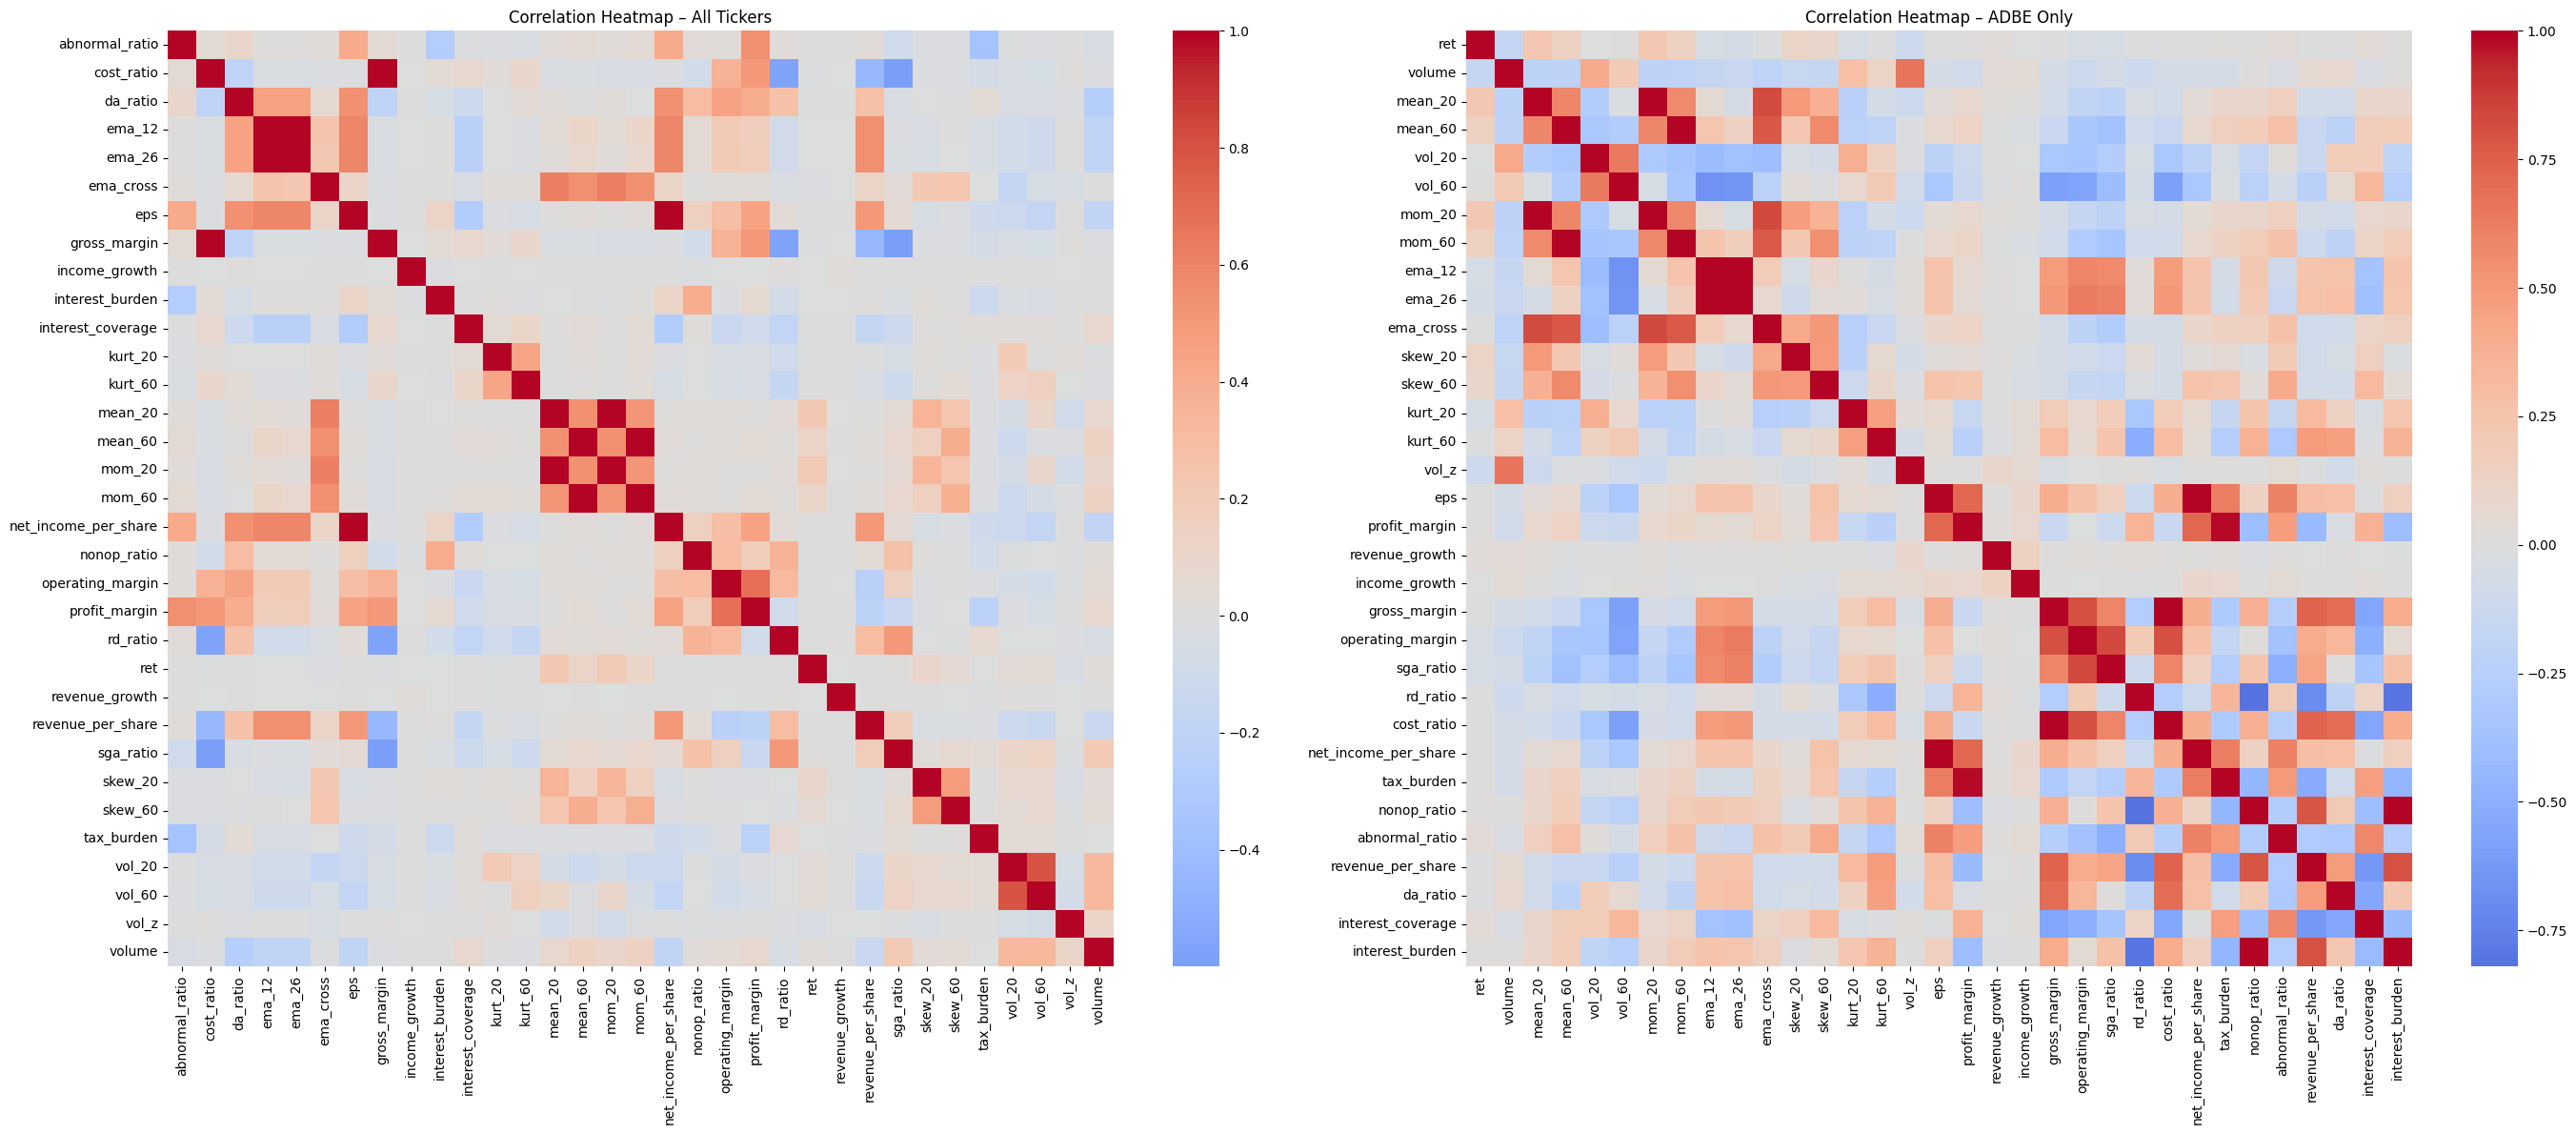

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_adbe = df[df["ticker"] == "ADBE"].drop(columns="ticker")
df_adbe = df_adbe.loc[:, df_adbe.nunique() > 1]  # remove constant columns
corr_adbe = df_adbe.corr()

fig, axes = plt.subplots(1, 2, figsize=(28, 12))

sns.heatmap(total_correlations, cmap="coolwarm", center=0, ax=axes[0])
axes[0].set_title("Correlation Heatmap – All Tickers")

sns.heatmap(corr_adbe, cmap="coolwarm", center=0, ax=axes[1])
axes[1].set_title("Correlation Heatmap – ADBE Only")

plt.tight_layout()
plt.show()

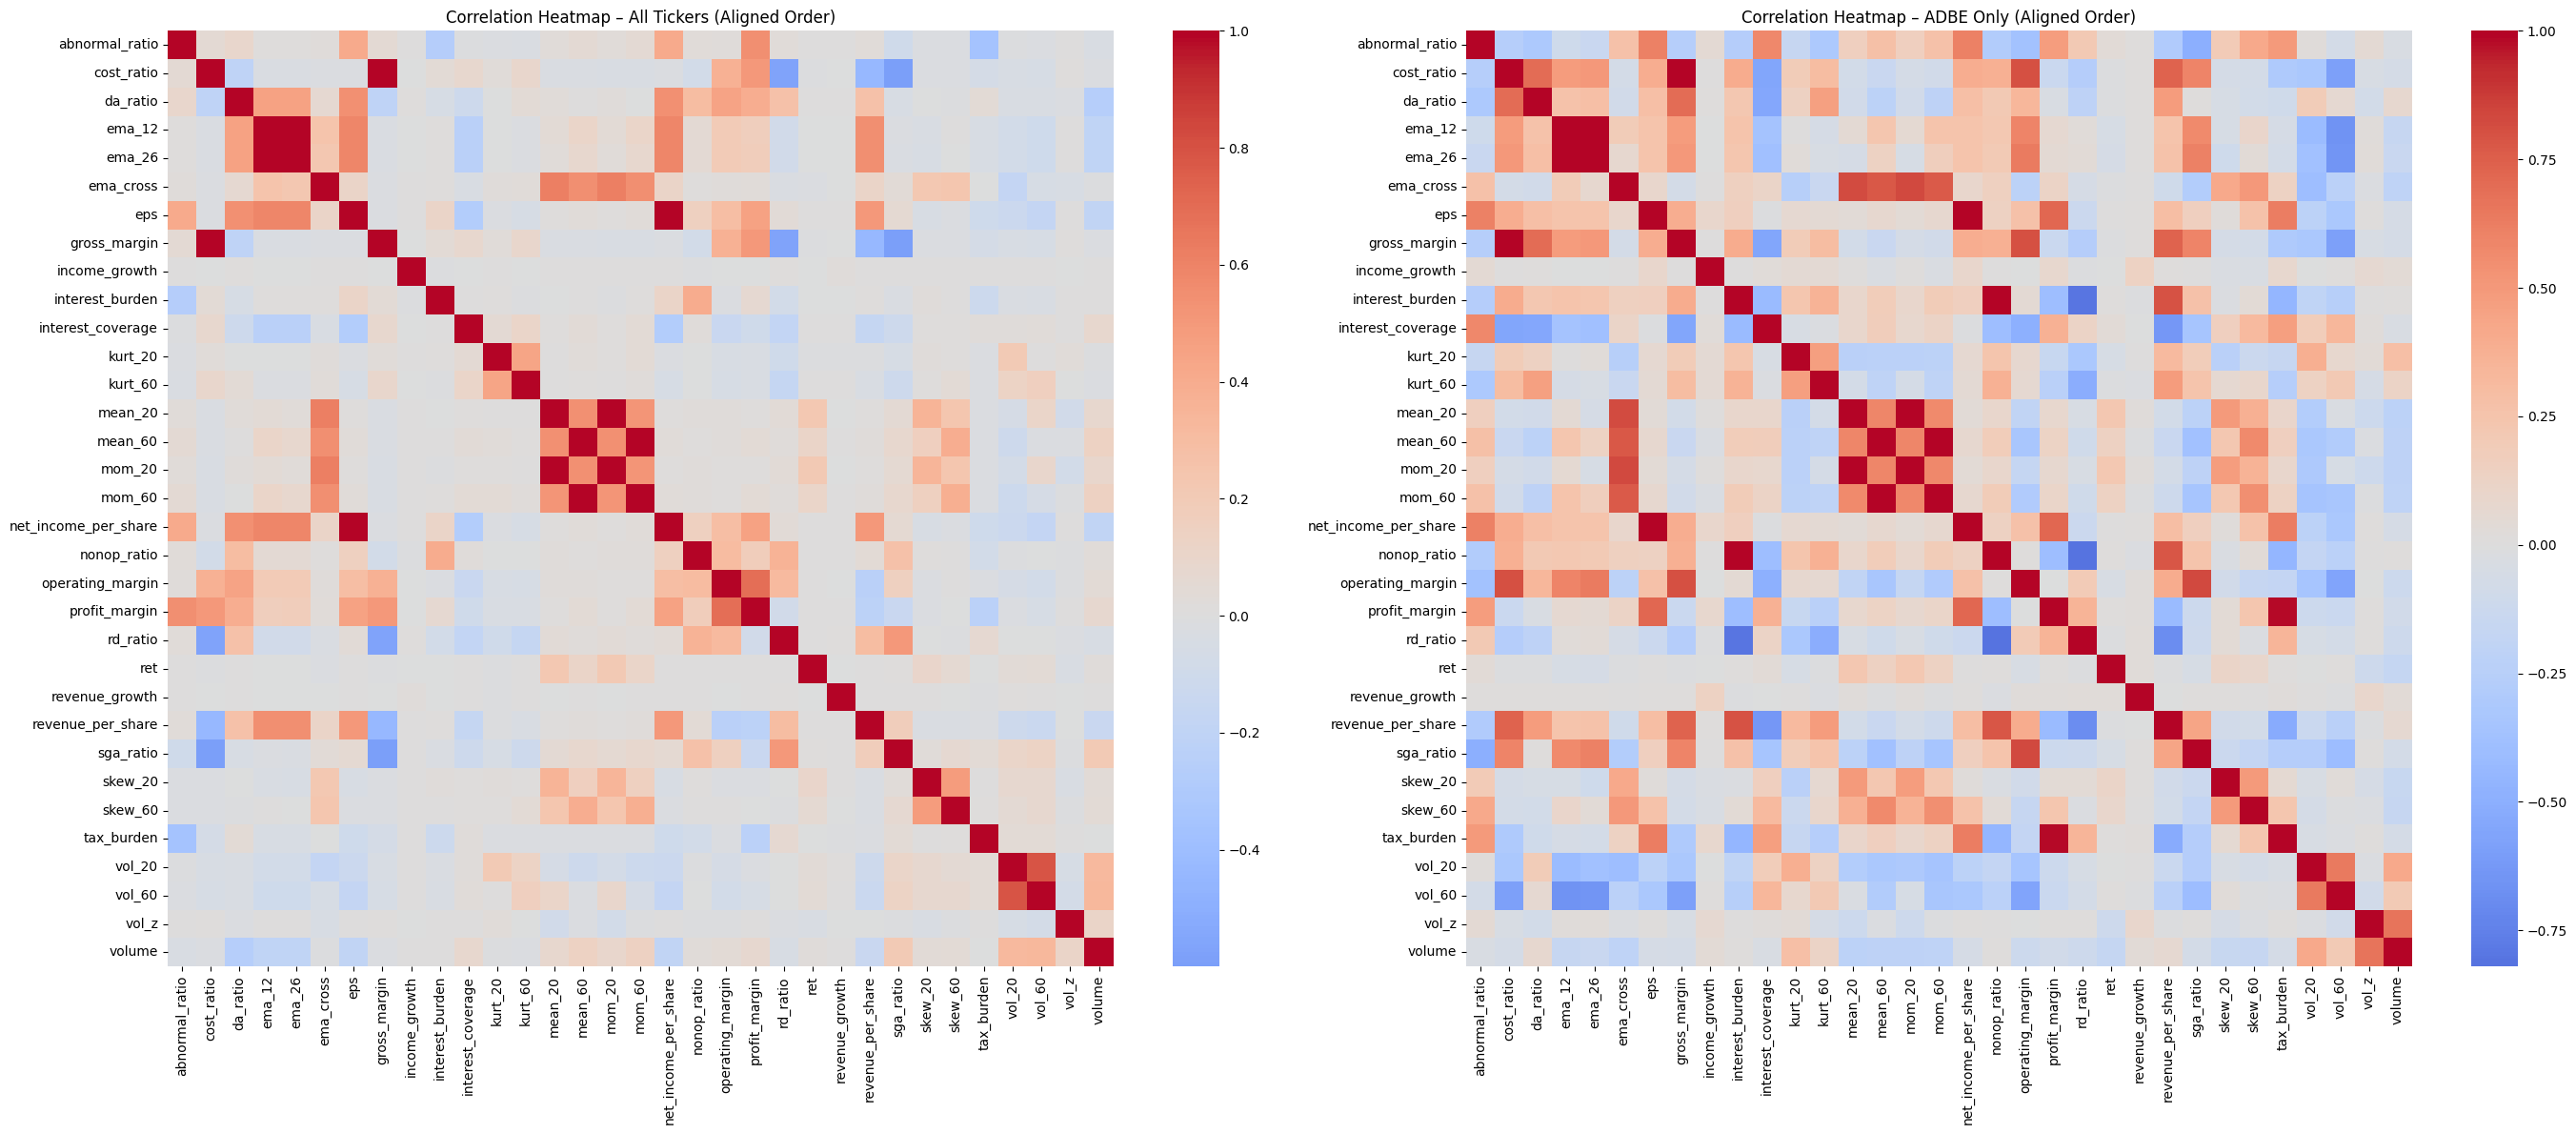

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute ADBE correlation
df_adbe = df[df["ticker"] == "ADBE"].drop(columns="ticker")
df_adbe = df_adbe.loc[:, df_adbe.nunique() > 1]  # remove constant columns
corr_adbe = df_adbe.corr()

# --- FORCE THE SAME ORDER AS total_correlations ---
common_cols = [col for col in total_correlations.columns if col in corr_adbe.columns]

corr_all_aligned = total_correlations.loc[common_cols, common_cols]
corr_adbe_aligned = corr_adbe.loc[common_cols, common_cols]

# ============================================================
# Plot side-by-side
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(28, 12))

sns.heatmap(corr_all_aligned, cmap="coolwarm", center=0, ax=axes[0])
axes[0].set_title("Correlation Heatmap – All Tickers (Aligned Order)")

sns.heatmap(corr_adbe_aligned, cmap="coolwarm", center=0, ax=axes[1])
axes[1].set_title("Correlation Heatmap – ADBE Only (Aligned Order)")

plt.tight_layout()
plt.show()


In [51]:
df = hf.create_binary_labels(df, [1, 20, 60])
count_1 = df["y_1"].value_counts()
count_20 = df["y_20"].value_counts()
count_60 = df["y_60"].value_counts()
print("Class distribution for y_1:\n", count_1)
print("\nClass distribution for y_20:\n", count_20)
print("\nClass distribution for y_60:\n", count_60)

/Users/santi/PycharmProjects/ML-Stock-Predictor/helper_functions.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'cumret_{h}'] = g['ret'].transform(
/Users/santi/PycharmProjects/ML-Stock-Predictor/helper_functions.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'y_{h}'] = np.where(
/Users/santi/PycharmProjects/ML-Stock-Predictor/helper_functions.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

Class distribution for y_1:
 y_1
1.0    31496
0.0    29215
Name: count, dtype: int64

Class distribution for y_20:
 y_20
1.0    34042
0.0    25738
Name: count, dtype: int64

Class distribution for y_60:
 y_60
1.0    35513
0.0    22307
Name: count, dtype: int64


/Users/santi/PycharmProjects/ML-Stock-Predictor/helper_functions.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'cumret_{h}'] = g['ret'].transform(
/Users/santi/PycharmProjects/ML-Stock-Predictor/helper_functions.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'y_{h}'] = np.where(
/Users/santi/PycharmProjects/ML-Stock-Predictor/helper_functions.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https: